# Visualization Fundamental With Mathplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
sale = pd.read_csv('supermarket_sales_nan.xlsx - Sheet1.csv')
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,"74,69",7,"26,1415","548,9715",1/5/2019,13:08,Ewallet,"522,83","4,761904762","26,1415","9,1"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,"15,28",5,"3,82","80,22",3/8/2019,10:29,Cash,"76,4","4,761904762","3,82","9,6"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,"46,33",7,"16,2155","340,5255",3/3/2019,13:23,Credit card,"324,31","4,761904762","16,2155","7,4"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,"58,22",8,"23,288","489,048",1/27/2019,20:33,Ewallet,"465,76","4,761904762","23,288","8,4"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,"86,31",7,"30,2085","634,3785",2/8/2019,10:37,Ewallet,"604,17","4,761904762","30,2085","5,3"


In [4]:
'''
C1: Print info of dataset
C2: Print a description of the dataset
C3: Print the unique value of the Product line
C4: Total gross income by Product line
C5: Average unit price by Gender
C6: Total Quality by City
C7: Total Revenue (Total) by Customer Type
C8: Total Quantity by Branch
'''

'\nC1: Print info of dataset\nC2: Print a description of the dataset\nC3: Print the unique value of the Product line\nC4: Total gross income by Product line\nC5: Average unit price by Gender\nC6: Total Quality by City\nC7: Total Revenue (Total) by Customer Type\nC8: Total Quantity by Branch\n'

In [5]:
#C1:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Invoice ID               1000 non-null   object
 1   Branch                   1000 non-null   object
 2   City                     1000 non-null   object
 3   Customer type            1000 non-null   object
 4   Gender                   1000 non-null   object
 5   Product line             1000 non-null   object
 6   Unit price               967 non-null    object
 7   Quantity                 1000 non-null   int64 
 8   Tax 5%                   1000 non-null   object
 9   Total                    1000 non-null   object
 10  Date                     1000 non-null   object
 11  Time                     1000 non-null   object
 12  Payment                  1000 non-null   object
 13  cogs                     1000 non-null   object
 14  gross margin percentage  1000 non-null   

In [6]:
#CHANGE Dtype
'''
- Branch, Customer type, Gender (Category)
- Unit price, Tax 5%, total, 13-16 (float64)
- Date (datetime64)
'''

'\n- Branch, Customer type, Gender (Category)\n- Unit price, Tax 5%, total, 13-16 (float64)\n- Date (datetime64)\n'

In [7]:
# sale['Unit price'] = sale['Unit price'].str.replace(',', '.').astype(float)
change_float = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
for c in change_float:
    sale[c] = pd.to_numeric(sale[c].str.replace(',', '.').astype(float))

sale['Date'] = pd.to_datetime(sale['Date'], format= "%m/%d/%Y")
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               967 non-null    float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [8]:
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
#C2: 
sale.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,967.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.536556,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.665000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,54.920000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.700000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.492817,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [10]:
#C3:
sale['Product line'].unique

<bound method Series.unique of 0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object>

In [11]:
#C4:
total_pro_gross = sale.groupby('Product line')['gross income'].sum().reset_index()
total_pro_gross

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


In [12]:
#C5:
avg_unit_gender = sale.groupby('Gender')['Unit price'].mean().reset_index()
avg_unit_gender

,Gender,Unit price
0,Female,55.132029
1,Male,55.940248


In [13]:
#C6
total_quatity_city = sale.groupby('City')['Quantity'].sum().reset_index()
total_quatity_city

,City,Quantity
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


In [14]:
#C7
total_cus_total = sale.groupby('Customer type')['Total'].sum().reset_index()
total_cus_total

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


In [15]:
#C8:
total_quantity_branch = sale.groupby('Branch')['Quantity'].sum().reset_index()
total_quantity_branch

,Branch,Quantity
0,A,1859
1,B,1820
2,C,1831


In [16]:
'''
- Thể hiện doanh số của 3 siêu thị ABC trong 4 tuần của tháng 1
VÀ đâu là tuần cao điểm bán hàng của các siêu thị này?
'''

'\n- Thể hiện doanh số của 3 siêu thị ABC trong 4 tuần của tháng 1\nVÀ đâu là tuần cao điểm bán hàng của các siêu thị này?\n'

# BƯỚC 1: Chuẩn bị data đầu vào

In [18]:
# quantity by week_num, branch
sale['Week_num'] = sale['Date'].dt.isocalendar().week
sale_by_period = sale.groupby(['Week_num', 'Branch'], as_index= True)['Quantity'].sum().reset_index()
sale_m1 = sale_by_period[sale_by_period['Week_num'] <=4]
sale_m1

,Week_num,Branch,Quantity
0,1,A,130
1,1,B,102
2,1,C,73
3,2,A,141
4,2,B,128
5,2,C,162
6,3,A,189
7,3,B,111
8,3,C,161
9,4,A,170


In [19]:
# prepare data on plot (NEU VE CHAY)
x = sale_m1['Week_num'].unique()
A = sale_m1[sale_m1['Branch'] == 'A']['Quantity'].unique()
B = sale_m1[sale_m1['Branch'] == 'B']['Quantity'].unique()
C = sale_m1[sale_m1['Branch'] == 'C']['Quantity'].unique()

# BUOC 2: Dựng chart đầu tiên

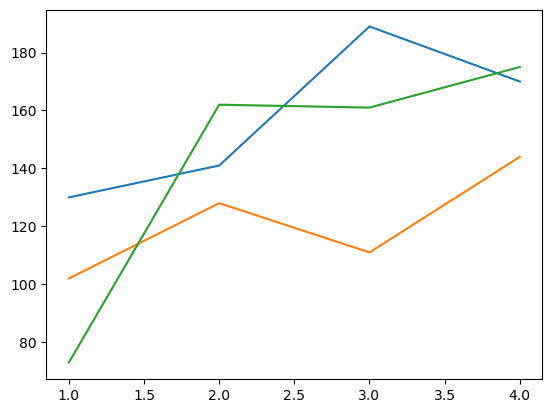

In [21]:
plt.plot(x,A)
plt.plot(x,B)
plt.plot(x,C)
plt.show()

# Bước 3: Bổ sung tiêu đề, legend cho chart và axis

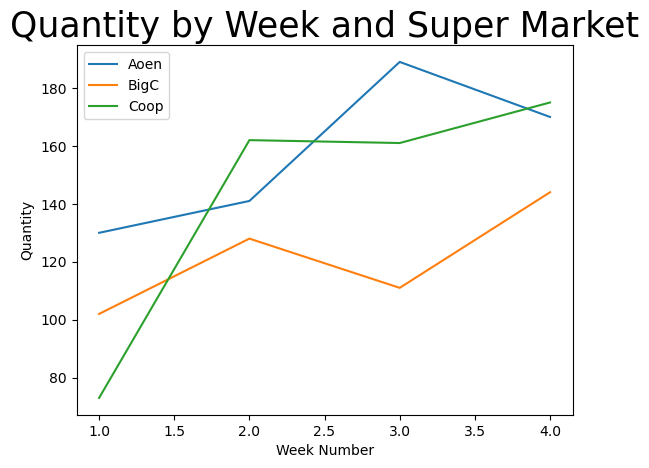

In [23]:
# Add legend, title
plt.plot(x, A, label='Aoen')
plt.plot(x, B, label='BigC')
plt.plot(x, C, label='Coop')

plt.title('Quantity by Week and Super Market', fontsize= 25)
plt.xlabel('Week Number', fontsize= 10)
plt.ylabel('Quantity', fontsize= 10)

plt.legend(loc= 'upper left') #location

plt.show()

# Bước 4: Điều chỉnh trục hoành

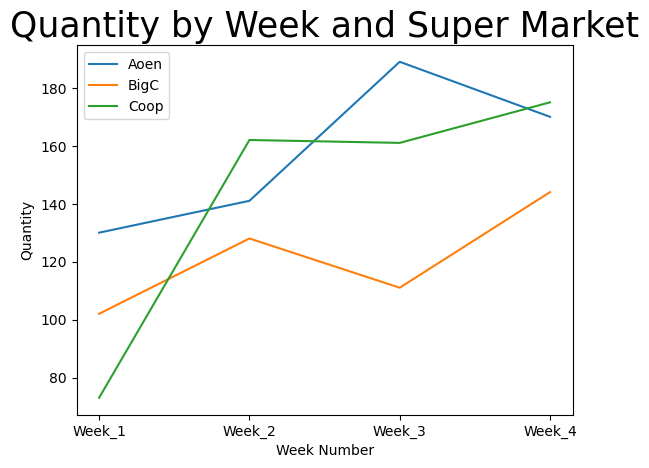

In [25]:
x = sale_m1['Week_num'].unique().astype('str')
A = sale_m1[sale_m1['Branch'] == 'A']['Quantity'].unique()
B = sale_m1[sale_m1['Branch'] == 'B']['Quantity'].unique()
C = sale_m1[sale_m1['Branch'] == 'C']['Quantity'].unique()

values = ['Week_' + n for n in x]
plt.plot(x, A, label='Aoen')
plt.plot(x, B, label='BigC')
plt.plot(x, C, label='Coop')

plt.title('Quantity by Week and Super Market', fontsize= 25)
plt.xlabel('Week Number', fontsize= 10)
plt.ylabel('Quantity', fontsize= 10)

plt.legend(loc= 'upper left') #location

plt.xticks(x, values)

# plt.xlim(0,3) #LIMIT X

plt.show()

# Bước 5: Add labels, text

In [27]:
# ADD labels
def addlabels(xs, ys):
    for x, y in zip(xs, ys): #?? zip

        label = "{:.0f}".format(y) #???

        plt.annotate(label, # text
                     xy = (x, y), #The coordinates to position the label
                     xytext = (x, y - 3),
                     ha = 'center' 
                    )

In [28]:
# ADD text
def addtext(x, y, text):
    plt.annotate(
        text, #text
        xy = (x, y),
        xytext = (x, y + 5),
        color = 'red',
        arrowprops= dict(facecolor = 'black', width = 2, headwidth = 4, headlength = 4),
        horizontalalignment = 'left', 
        verticalalignment = 'top'
    )

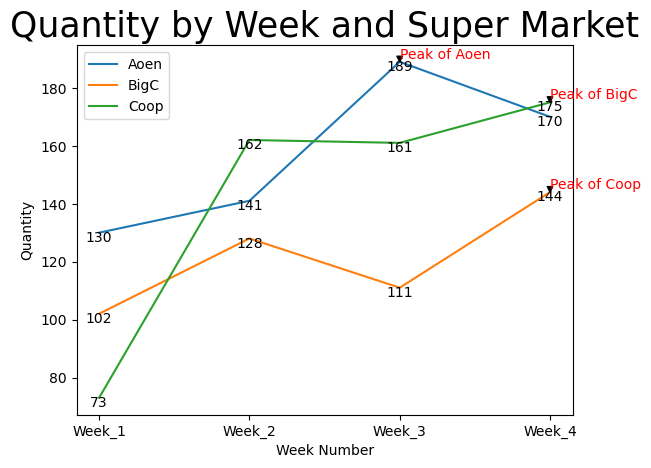

In [69]:
# Add text and label
x = sale_m1['Week_num'].unique().astype('str')
A = sale_m1[sale_m1['Branch'] == 'A']['Quantity'].unique()
B = sale_m1[sale_m1['Branch'] == 'B']['Quantity'].unique()
C = sale_m1[sale_m1['Branch'] == 'C']['Quantity'].unique()

values = ['Week_' + n for n in x]
plt.plot(x, A, label='Aoen')
plt.plot(x, B, label='BigC')
plt.plot(x, C, label='Coop')

plt.title('Quantity by Week and Super Market', fontsize= 25)
plt.xlabel('Week Number', fontsize= 10)
plt.ylabel('Quantity', fontsize= 10)

plt.legend(loc= 'upper left') #location

plt.xticks(x, values)

addlabels(x,A)
addlabels(x,B)
addlabels(x,C)

addtext(2,189,'Peak of Aoen')
addtext(3,175,'Peak of BigC')
addtext(3,144,'Peak of Coop')


plt.show()

# Bước 6: Điều chỉnh kích thước

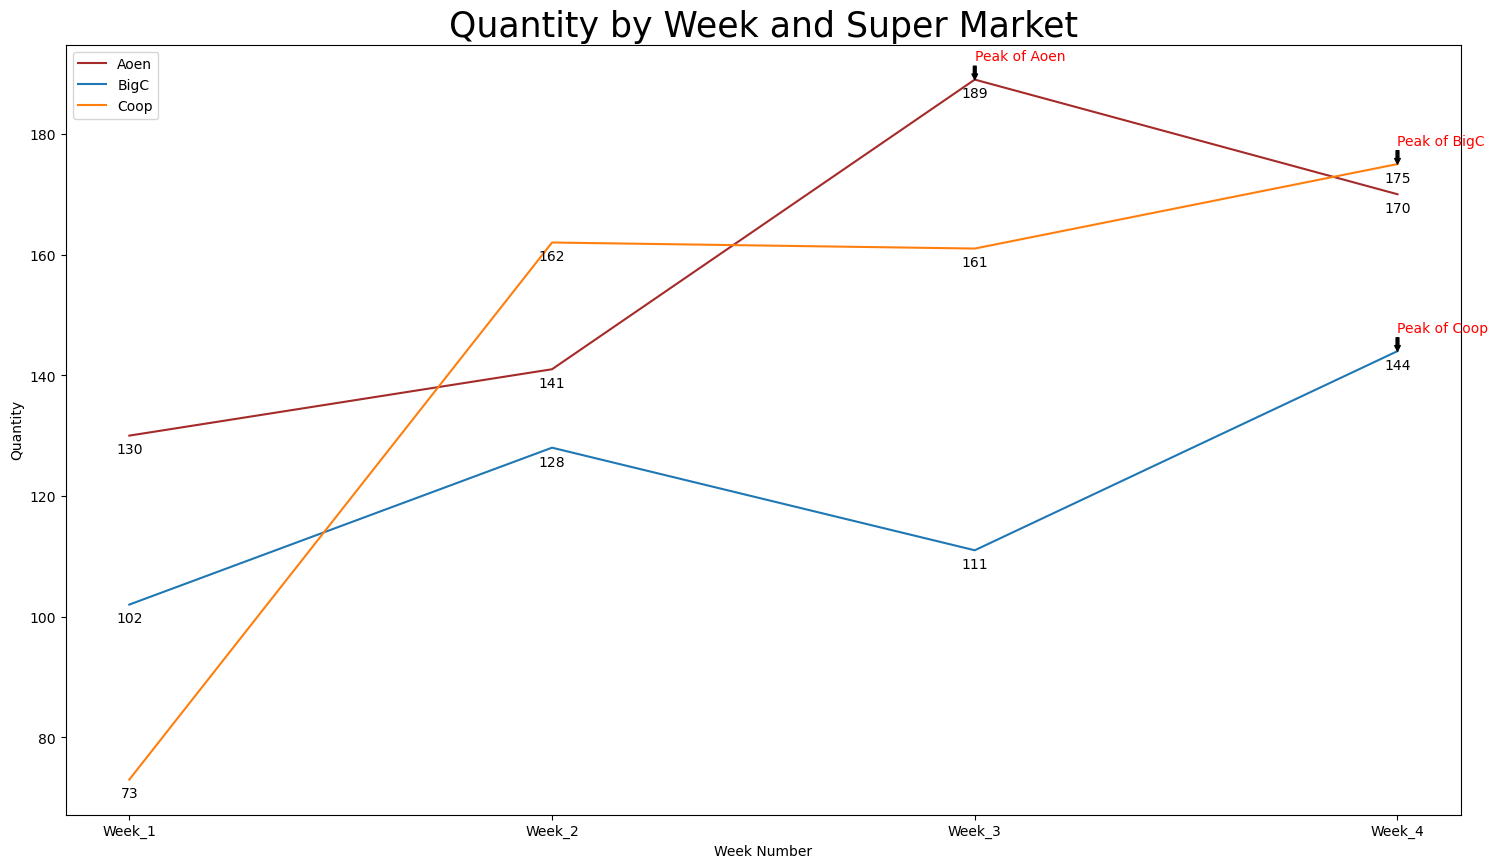

In [31]:
# Prepare data
x = sale_m1['Week_num'].unique().astype('str')
A = sale_m1[sale_m1['Branch'] == 'A']['Quantity'].unique()
B = sale_m1[sale_m1['Branch'] == 'B']['Quantity'].unique()
C = sale_m1[sale_m1['Branch'] == 'C']['Quantity'].unique()

#Set size
plt.figure(figsize=(18,10))

#Plot 
values = ['Week_' + n for n in x]
plt.plot(x, A, label='Aoen', c='brown') 
plt.plot(x, B, label='BigC')
plt.plot(x, C, label='Coop')

# Decorate
plt.title('Quantity by Week and Super Market', fontsize= 25)
plt.xlabel('Week Number', fontsize= 10)
plt.ylabel('Quantity', fontsize= 10)

plt.legend(loc= 'upper left') #location

plt.xticks(x, values)

addlabels(x,A)
addlabels(x,B)
addlabels(x,C)

addtext(2,189,'Peak of Aoen')
addtext(3,175,'Peak of BigC')
addtext(3,144,'Peak of Coop')

plt.show()

# CÁCH 2

In [33]:
sale_m1['Week_num'] = sale_m1['Week_num'].astype(str)
sale_m1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Week_num  12 non-null     object
 1   Branch    12 non-null     object
 2   Quantity  12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 384.0+ bytes


C:\Users\luong\AppData\Local\Temp\ipykernel_2312\1253489879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_m1['Week_num'] = sale_m1['Week_num'].astype(str)


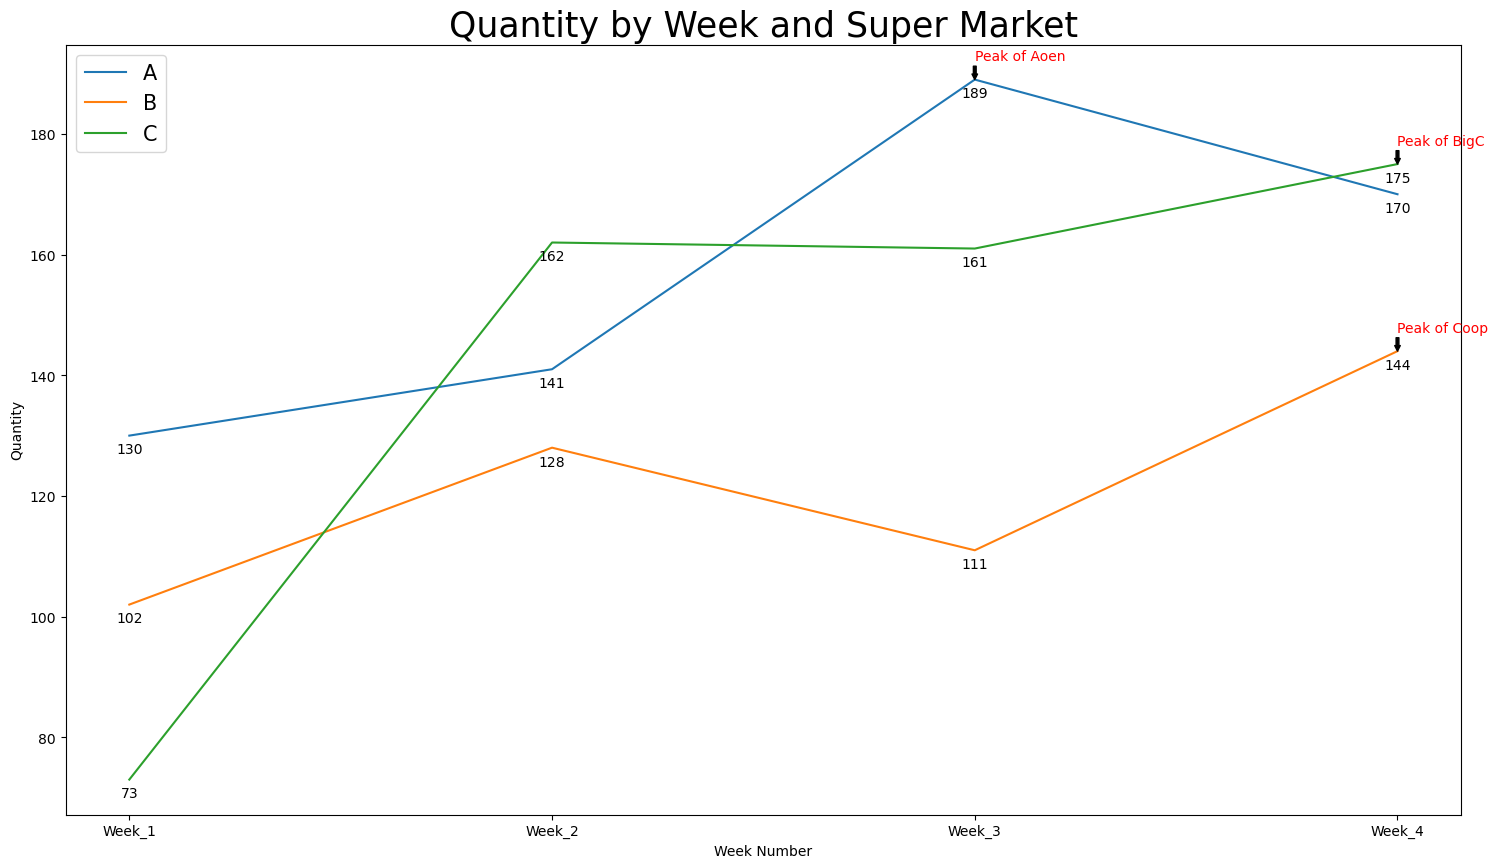

In [34]:
import seaborn as sns

# Set size
plt.figure(figsize=(18, 10))

# # Plot
sns.lineplot(data=sale_m1, x="Week_num", y="Quantity", hue="Branch")

# # Decorate
plt.title('Quantity by Week and Super Market', fontsize= 25)
plt.xlabel('Week Number', fontsize= 10)
plt.ylabel('Quantity', fontsize= 10)

plt.legend(loc= 'upper left', fontsize = 15) #location

# # Show x
values = ['Week_' + n for n in x]
plt.xticks(x, values)

addlabels(x,A)
addlabels(x,B)
addlabels(x,C)

addtext(2,189,'Peak of Aoen')
addtext(3,175,'Peak of BigC')
addtext(3,144,'Peak of Coop')


# Correlation
 - Visualize the relationship between 2 or more variable

<p>1. Scatter plot

In [37]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

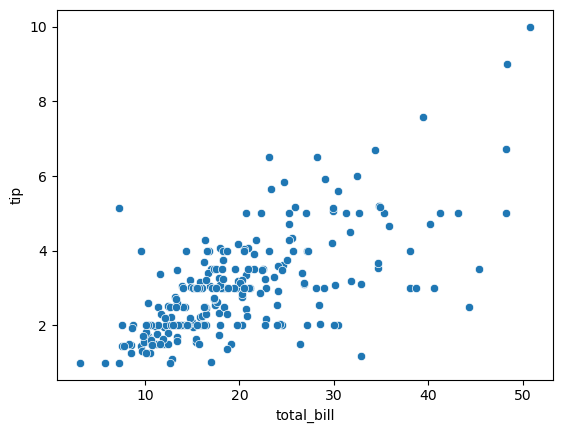

In [38]:
sns.scatterplot(
    data= tips, x='total_bill', y='tip'
)